In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.57', '1.1.0')

In [4]:
torch.cuda.set_device(0)

In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-gujarati/language-model')

In [6]:
from inltk.tokenizer import GujaratiTokenizer

In [7]:
GujaratiTokenizer

inltk.tokenizer.GujaratiTokenizer

In [8]:
# class GujaratiTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/gujarati_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [9]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/gujarati_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(20000)]

In [10]:
itos

['<unk>',
 '<s>',
 '</s>',
 '.',
 ',',
 '▁છે',
 '▁',
 '▁અને',
 'ની',
 'માં',
 'ના',
 '▁આ',
 'ને',
 '▁જ',
 '▁એક',
 '▁તેમ',
 '▁આવેલા',
 'નો',
 'નું',
 '▁કે',
 '▁ગામમાં',
 '▁ખેતી',
 '▁પણ',
 '▁માટે',
 'થી',
 '▁આવે',
 '▁ભાગમાં',
 '▁કરવામાં',
 '▁તે',
 'ો',
 'ે',
 '▁q',
 '▁�',
 'ી',
 '-',
 '▁ગામ',
 '▁પર',
 '▁હતી',
 '▁ભારત',
 '▁ગુજરાત',
 '▁મુખ્ય',
 '▁જે',
 'X',
 '▁આવેલું',
 '▁હતા',
 '▁સ્થાન',
 'એ',
 '▁એ',
 '▁હતો',
 '▁પશ્ચિમ',
 '▁ડેરી',
 '▁રાજ્યના',
 '▁દેશના',
 '▁ભારતમાં',
 '▁મુખ્યત્વે',
 '▁સાથે',
 '▁શાળા',
 '▁હતું',
 '▁જેવી',
 'ં',
 '▁પ્રાથમિક',
 '▁કરી',
 '▁દૂધ',
 '▁અન્ય',
 '▁પશુપાલન',
 '▁ગામના',
 '▁હોય',
 '▁ખેતમજૂરી',
 '▁આંગણવાડી',
 '▁વ્યવસાય',
 '▁પંચાયતઘર',
 '�',
 '▁પ્રાપ્ય',
 '▁સવલતો',
 '▁તરીકે',
 '▁લોકોનો',
 '▁તાલુકામાં',
 'ગુજરાત',
 '▁જિલ્લામાં',
 '▁પાક',
 '▁દ્વારા',
 '▁કરે',
 '▁થયેલી',
 'ા',
 '▁શાકભાજીના',
 '▁કુલ',
 '▁એવા',
 '▁થાય',
 'ક',
 '▁રીતે',
 'ન',
 'સ',
 '▁બાજરી',
 'ર',
 '▁પૈકીના',
 '▁લોકો',
 '▁કપાસ',
 '▁તેઓ',
 '▁"',
 '▁તાલુકાઓ',
 '▁તેના',
 'નાં',
 '"',
 'લ',
 'ઓ',
 '▁ઘઉં',
 '▁વધુ

In [11]:
# 20,000 is the vocab size that we chose in sentencepiece
gujarati_vocab = Vocab(itos)

In [12]:
tokenizer = Tokenizer(tok_func=GujaratiTokenizer, lang='gu')

In [13]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [14]:
data_lm = TextLMDataBunch.from_folder(path=path/'transformer', tokenizer=tokenizer, vocab=gujarati_vocab)

In [15]:
data_lm.batch_size

64

In [16]:
data_lm.save()

In [17]:
data_lm.show_batch()

idx,text
0,"▁મુખ્યત્વે ▁મકાઈ , ▁બાજરી , ▁કપાસ , ▁દિવેલી , ▁તમાકુ , ▁બટાટા , ▁શક્કરીયાં ▁તેમ ▁જ ▁અન્ય ▁શાકભાજીના ▁પાક ની ▁ખેતી ▁કરવામાં ▁આવે ▁છે . ▁આ ▁ગામમાં ▁પ્રાથમિક ▁શાળા , ▁પંચાયતઘર , ▁આંગણવાડી ▁તેમ ▁જ ▁દૂધ ની ▁ડેરી ▁જેવી ▁સવલતો ▁પ્રાપ્ય ▁થયેલી ▁છે . ▁x x bo s ▁હોલ ો ▁એ ▁આપણા ▁ગુજરાત ▁સહિત ▁દેશના ▁મોટા ▁ભાગમાં ▁જોવા ▁મળતું ▁ઘરઆંગણ ા નું ▁કપોત ▁કુળ નું ▁પક્ષી ▁છે . ▁તેની ▁ચાર"
1,"૨૭ , ૭ ૨૭ ▁હતી ▁જે ▁પૈકીના ં ▁૨૨ . ૪૦ % ▁લોકો ▁શહેરી ▁વિસ્તારમાં ▁વસવાટ ▁કરે ▁છે . ▁x x bo s ▁ગુજરાત ▁અને ▁ભારતમાં ▁સ્થાન ▁દૂધ ની ▁ડેરી ▁ચણા , ▁કપાસ , ▁દિવેલા , ▁રજકો ▁તેમજ ▁શાકભાજી ▁સરસ ીયા ▁ભારત ▁દેશના ▁પશ્ચિમ ▁ભાગમાં ▁આવેલા ▁ગુજરાત ▁રાજ્યના ▁સૌરાષ્ટ્ર ▁વિસ્તારમાં ▁આવેલા ▁અમરેલી ▁જિલ્લામાં ▁આવેલા ▁કુલ ▁૧૧ ▁તાલુકાઓ ▁પૈકીના ▁એક ▁એવા ▁ધારી ▁તાલુકામાં ▁આવેલું ▁એક ▁ગામ ▁છે . ▁સરસ ીયા ▁ગામના"
2,"▁આવેલા ▁મહ ીસાગર ▁જિલ્લામાં ▁આવેલા ▁લુણાવાડા ▁તાલુકા નું ▁એક ▁ગામ ▁છે . ▁કાં ક લીયા ▁ગામના ▁લોકોનો ▁મુખ્ય ▁વ્યવસાય ▁ખેતી , ▁ખેતમજૂરી ▁તેમ ▁જ ▁પશુપાલન ▁છે . ▁આ ▁ગામમાં ▁મુખ્યત્વે ▁મકાઈ , ▁બાજરી , ▁તુવર ▁તેમ ▁જ ▁શાકભાજીના ▁પાક ની ▁ખેતી ▁કરવામાં ▁આવે ▁છે . ▁આ ▁ગામમાં ▁પ્રાથમિક ▁શાળા , ▁પંચાયતઘર , ▁આંગણવાડી ▁તેમ ▁જ ▁દૂધ ની ▁ડેરી ▁જેવી ▁સવલતો ▁પ્રાપ્ય ▁થયેલી ▁છે . ▁x x bo s ▁ગુજરાત ▁અને"
3,"▁વેલેન્ટાઇન ▁પોસ્ટ કાર્ડ ▁અંદાજે ▁1900 થી ▁1910 ▁નાની ▁2 ▁ઇંચ ની ▁પોપ - અપ ▁વેલેન્ટાઇન ▁શુભેચ્છા ▁પત્રિકા ▁અંદાજે ▁1920 ▁ફૂટબોલ ▁રમી ▁રહેલો ▁ડિઝની ▁જેવો ▁દેખાતો ▁ઉંદર ડો ▁અને ▁બુલ ડો ગ ▁જાતિના ▁કૂતરા ને ▁જમણી ▁બાજુએ ▁મૂકે લા ▁પુલ ▁ટેબ ▁મારફતે ▁ગતિ ▁આપવામાં ▁આવી ▁છે , ▁અંદાજે ▁1920 ▁પત્રિકા ની ▁મધ્યમાં ▁વીજ પ્રતિ રોધક ▁સ ળ િયો ▁રાખવામાં ▁આવ્યો ▁છે ▁જેના ▁કારણે ▁કૂતરા ની ▁આંખ ની ▁કી કી ઓ ▁બંને"
4,"▁સાથે ▁ખરાબ ▁પરિસ્થિતિ ▁માં ▁શરૂ ▁થયો . ▁14 ▁ડિસેમ્બર ▁1962 ▁ના ▁તેમના ▁10 9 - દિવસીય ▁કક્ષ ીય ▁સ્થળાંતર ▁સાથે ▁જ ▁તે ▁શુક્ર ▁ની ▁ધરતી ▁થી ▁34 , 88 3 ▁કિમી ▁ઉપર ▁થી ▁પસાર ▁થવા ▁વાર ો ▁દુનિયા ▁નો ▁પ્રથમ ▁સફળ ▁આંતર ગ્રહ ીય ▁મિશન ▁બની ▁ગયો . ▁આ ▁ના ▁માઈક્રો વે વ ▁અને ▁ઇન્ફ્રારેડ ▁રેડિયો મીટર ▁થી ▁ખબર ▁પડી ▁કે ▁શુક્ર ▁ના ▁સૌથી ▁ઉપરી ▁વાદળ ▁શાંત ▁હતા ▁જ્યારે ▁પૂર્વ"


In [18]:
len(data_lm.vocab.itos)

20000

In [19]:
learn = language_model_learner(data_lm, TransformerXL, pretrained=False)

In [20]:
gc.collect()

20

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


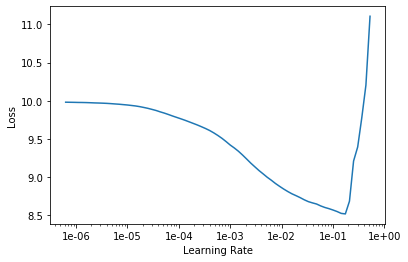

In [22]:
learn.recorder.plot()

In [23]:
learn.model

SequentialRNN(
  (0): TransformerXL(
    (encoder): Embedding(20000, 410)
    (pos_enc): PositionalEncoding()
    (drop_emb): Dropout(p=0.1)
    (layers): ModuleList(
      (0): DecoderLayer(
        (mhra): MultiHeadRelativeAttention(
          (attention): Linear(in_features=410, out_features=1230, bias=False)
          (out): Linear(in_features=410, out_features=410, bias=False)
          (drop_att): Dropout(p=0.1)
          (drop_res): Dropout(p=0.1)
          (ln): LayerNorm(torch.Size([410]), eps=1e-05, elementwise_affine=True)
          (r_attn): Linear(in_features=410, out_features=410, bias=False)
        )
        (ff): SequentialEx(
          (layers): ModuleList(
            (0): Linear(in_features=410, out_features=2100, bias=True)
            (1): ReLU(inplace)
            (2): Dropout(p=0.1)
            (3): Linear(in_features=2100, out_features=410, bias=True)
            (4): Dropout(p=0.1)
            (5): MergeLayer()
            (6): LayerNorm(torch.Size([410]), eps

In [24]:
learn.fit_one_cycle(20, 1e-3, moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='model')])

epoch,train_loss,valid_loss,accuracy,time
0,5.482743,5.258771,0.302123,10:46
1,4.634204,4.804011,0.332904,10:45
2,4.389263,4.470369,0.351169,10:45
3,4.311111,4.236722,0.366975,10:44
4,3.973635,4.110125,0.374593,10:45
5,3.930423,4.043270,0.381622,10:47
6,3.844898,3.945026,0.387515,10:49
7,3.791715,3.871594,0.393068,10:49
8,3.655746,3.812247,0.399462,10:50
9,3.624314,3.724213,0.407831,10:51


Better model found at epoch 0 with accuracy value: 0.30212295055389404.
Better model found at epoch 1 with accuracy value: 0.3329038918018341.
Better model found at epoch 2 with accuracy value: 0.35116884112358093.
Better model found at epoch 3 with accuracy value: 0.36697545647621155.
Better model found at epoch 4 with accuracy value: 0.3745930790901184.
Better model found at epoch 5 with accuracy value: 0.38162174820899963.
Better model found at epoch 6 with accuracy value: 0.38751542568206787.
Better model found at epoch 7 with accuracy value: 0.3930676579475403.
Better model found at epoch 8 with accuracy value: 0.39946219325065613.
Better model found at epoch 9 with accuracy value: 0.4078311026096344.
Better model found at epoch 10 with accuracy value: 0.4157285690307617.
Better model found at epoch 11 with accuracy value: 0.42351892590522766.
Better model found at epoch 12 with accuracy value: 0.4323589503765106.
Better model found at epoch 13 with accuracy value: 0.4391165971755

In [25]:
TEXT = "ગુજરાત"
N_WORDS = 40
N_SENTENCES = 2

In [26]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

ગુજરાત ▁અને ▁ભારતમાં ▁સ્થાન ▁કે ળ ▁ભારત ▁દેશના ▁પશ્ચિમ ▁ભાગમાં ▁આવેલા ▁ગુજરાત ▁રાજ્યના ▁ઉત્તર ▁ભાગમાં ▁આવેલા ▁બનાસકાંઠા ▁જિલ્લામાં ▁આવેલા ▁કુલ ▁૧૪ ▁તાલુકાઓ ▁પૈકીના ▁એક ▁એવા ▁ધાનેરા ▁તાલુકામાં ▁આવેલું ▁એક ▁ગામ ▁છે . ▁કે ળ ▁ગામના ▁લોકોનો ▁મુખ્ય ▁વ્યવસાય ▁ખેતી , ▁ખેતમજૂરી
ગુજરાત ▁અને ▁ભારતમાં ▁સ્થાન ▁દૂધ ની ▁ડેરી ▁ચણા , ▁કપાસ , ▁દિવેલા , ▁રજકો ▁તેમજ ▁શાકભાજી ▁કોઠા ડીયા ▁ભારત ▁દેશના ▁પશ્ચિમ ▁ભાગમાં ▁આવેલા ▁ગુજરાત ▁રાજ્યના ▁સૌરાષ્ટ્ર ▁વિસ્તારમાં ▁આવેલા ▁અમરેલી ▁જિલ્લામાં ▁આવેલા ▁કુલ ▁૧૧ ▁તાલુકાઓ ▁પૈકીના ▁એક ▁એવા ▁ખાંભા ▁તાલુકામાં ▁આવેલું ▁એક


In [27]:
np.exp(3.336792)

28.12874479703069

In [28]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [29]:
# Generating embedding vectors for visualization

In [30]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-gujarati/language-model')

In [12]:
# defaults.device = torch.device('cpu')

In [14]:
# learn = load_learner(path / 'GujaratiDataset/')

In [31]:
encoder = get_model(learn.model)[0]

In [32]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([20000, 410])

In [33]:
embeddings = encoder.state_dict()['encoder.weight']

In [34]:
embeddings = np.array(embeddings)

In [35]:
embeddings[0].shape

(410,)

In [36]:
df = pd.DataFrame(embeddings)

In [37]:
df.shape

(20000, 410)

In [38]:
df.to_csv('embeddings_transformer.tsv', sep='\t', index=False, header=False)

In [39]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,400,401,402,403,404,405,406,407,408,409
0,-0.219362,0.169356,-0.325940,0.139796,0.186205,-0.171053,0.021949,-0.195299,0.222833,-0.063875,...,-0.294684,-0.051093,0.087507,0.167323,-0.025542,0.122528,-0.305256,-0.400959,0.060725,-0.201464
1,0.206146,-0.189957,-0.070082,-0.139482,-0.012797,0.033483,-0.024374,0.050098,0.015184,-0.209563,...,-0.158793,-0.005378,0.255807,-0.155698,0.020708,0.069757,0.031914,0.221062,0.321345,-0.244561
2,0.199385,-0.185504,-0.083854,-0.141421,-0.017199,0.026786,-0.030184,0.061197,0.020538,-0.203361,...,-0.157722,-0.014079,0.257975,-0.170310,0.032295,0.072032,0.034321,0.218060,0.324610,-0.250018
3,-0.325436,0.135226,0.279856,0.395852,0.194274,-0.113369,-0.008104,0.002369,-0.251575,0.430256,...,0.130794,0.142979,-0.289274,0.238762,-0.288147,-0.444972,0.570524,-0.380489,0.646494,0.040204
4,-0.362696,0.092874,0.005255,0.083179,0.173212,0.104630,-0.027046,-0.062194,-0.207372,0.455595,...,0.057095,0.010565,-0.244574,-0.230967,-0.331063,-0.124080,0.519615,-0.360190,-0.290440,0.236591


In [40]:
df2 = pd.DataFrame(itos)

In [41]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,.
4,","


In [42]:
df2.shape

(20000, 1)

In [43]:
df2.to_csv('embeddings_transformer_metadata.tsv', sep='\t', index=False, header=False)

In [44]:
encoder.state_dict()['encoder.weight'][1]

tensor([ 0.2061, -0.1900, -0.0701, -0.1395, -0.0128,  0.0335, -0.0244,  0.0501,
         0.0152, -0.2096,  0.1785,  0.1761,  0.1272, -0.0452, -0.2857,  0.1407,
         0.1105,  0.0137, -0.0501, -0.3878, -0.0711,  0.2909,  0.2603,  0.0747,
        -0.2745, -0.1565,  0.2664,  0.4928,  0.2273,  0.0009, -0.1338,  0.0137,
        -0.2344, -0.1137, -0.1170,  0.0019, -0.1817, -0.1882, -0.0960,  0.1385,
        -0.0960, -0.1383, -0.1745, -0.3204,  0.0648,  0.1075, -0.1242,  0.1911,
         0.1702,  0.1536,  0.0584,  0.2445, -0.2514,  0.0175,  0.0533, -0.3792,
        -0.0722,  0.3086,  0.1448, -0.1048,  0.1130,  0.0690, -0.0094, -0.0204,
         0.0956, -0.1271,  0.0045, -0.0751, -0.0052, -0.0679,  0.0620, -0.2474,
         0.0200, -0.1304,  0.3381, -0.0098, -0.0799, -0.0019, -0.1866, -0.1657,
        -0.0246, -0.4796,  0.1132, -0.0148,  0.1152, -0.0615, -0.1035,  0.1069,
        -0.1443, -0.1833, -0.1768, -0.1083, -0.3323, -0.0482,  0.3383,  0.0131,
        -0.2484,  0.0700, -0.1408,  0.00